## Chapter7.2 ニューラルネットワーク

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

プロット用関数の定義

In [2]:
def plot_boundary():
    # 0.05刻みのグリッド点を生成する
    xx, yy = np.meshgrid(np.arange(-5, 5, 0.05),
                         np.arange(-5, 5, 0.05))
    # 生成したグリッド点1つ1つを推論をする
    Z = predict(np.c_[xx.ravel(), yy.ravel()])

    # 描画用に2次元配列に変換
    Z = Z.reshape(xx.shape)

    # 識別領域を色別に描画
    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.5)
    plt.colorbar(ticks=[0, 0.5, 1])

    # 識別境界を描画
    plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])

単純パーセプトロン

In [3]:
# 単純パーセプトロン
def predict(X_dataset):
    pred = []
    for X in X_dataset:
        a_out = 1 if (np.dot(w, X) + b) > 0 else 0
        pred.append(a_out)
    return np.array(pred, dtype=np.float32)

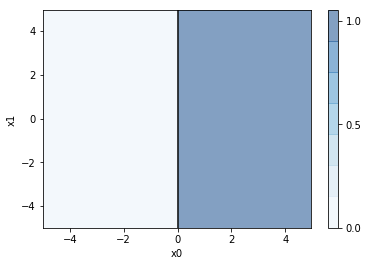

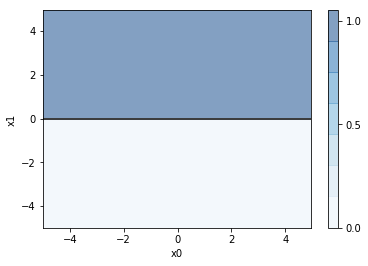

In [4]:
w = [1., 0.]
b = 0.

plot_boundary()
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

w = [0., 1.]
b = 0.

plot_boundary()
plt.xlabel('x0')
plt.ylabel('x1')

隠れ層をもつニューラルネットワーク

In [5]:
# 重みとバイアスを設定
w11 = [1., 0.]
w12 = [0., 1.]
w21 = [1., 1.]
b11 = 0.
b12 = 0.
b21 = -1.5

In [6]:
def predict(X_dataset):
    pred = []
    for X in X_dataset:
        a11_out = 1 if (np.dot(w11, X) + b11) > 0 else 0
        a12_out = 1 if (np.dot(w12, X) + b12) > 0 else 0
        a21_out = 1 if (np.dot(w21, [a11_out, a12_out]) + b21) > 0 else 0
        pred.append(a21_out)
    return np.array(pred, dtype=np.float32)


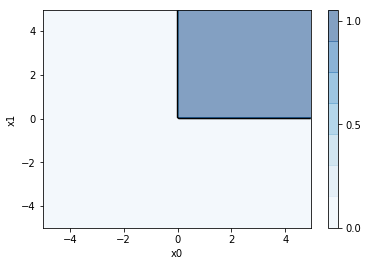

In [7]:
plot_boundary()
plt.xlabel('x0')
plt.ylabel('x1')

重みを変えると識別境界がどう変わるか

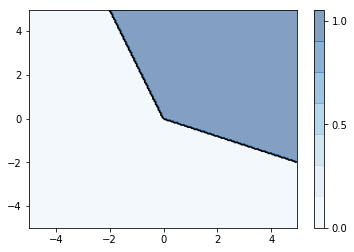

In [8]:
# 斜めの識別境界をANDで繋げる
w11 = [0.5, 0.2]
w12 = [0.2, 0.5]
w21 = [1.0, 1.0]
b11 = 0.
b12 = 0.
b21 = -1.5

plot_boundary()

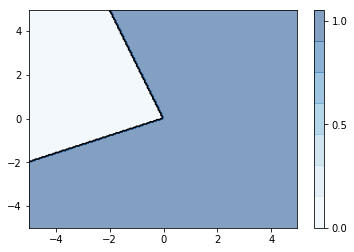

In [9]:
# 別の斜めの識別境界をORで繋げる
w11 = [0.5, 0.2]
w12 = [0.2, -0.5]
w21 = [1.0, 1.0]
b11 = 0.
b12 = 0.
b21 = -0.5

plot_boundary()

隠れ層を3ユニットに

In [10]:
def predict(X_dataset):
    pred = []
    for X in X_dataset:
        a11_out = 1 if (np.dot(w11, X) + b11) > 0 else 0
        a12_out = 1 if (np.dot(w12, X) + b12) > 0 else 0
        a13_out = 1 if (np.dot(w13, X) + b13) > 0 else 0  # 1ユニット追加
        a21_out = 1 if (np.dot(w21, [a11_out, a12_out, a13_out]) + b21) > 0 else 0
        pred.append(a21_out)
    return np.array(pred, dtype=np.float32)

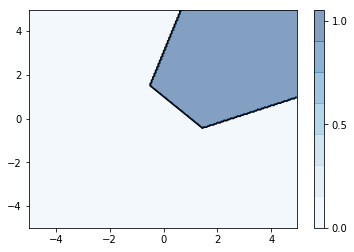

In [11]:
# 3つの識別境界をAND
w11 = [0.2, 0.2]
w12 = [-0.2, 0.5]
w13 = [0.6, -0.2]
w21 = [1.0, 1.0, 1.0]
b11 = -0.2
b12 = 0.5
b13 = 0.6
b21 = -2.5

plot_boundary()